In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix


In [36]:
df=pd.read_csv('Traffic_Crashes_-_Crashes.csv')
df1=pd.read_csv('Traffic_Crashes_-_People.csv')
df2=pd.read_csv('Traffic_Crashes_-_Vehicles.csv')

/Users/jeffreyng/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (12,13,20,21,22,23,24,25,26,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/jeffreyng/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,19,21,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,57,58,59,60,61,66,67,68,69,70,71) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [37]:
result=pd.merge(df, df1, on=['CRASH_RECORD_ID'], how = 'inner')

In [38]:
result=pd.merge(result, df2, on=['CRASH_RECORD_ID'], how = 'inner')

In [39]:
result.drop_duplicates(subset='CRASH_RECORD_ID', inplace=True)

In [40]:
result.drop(['CARGO_BODY_TYPE', 'LOAD_TYPE', 'HAZMAT_OUT_OF_SERVICE_I'], axis=1, inplace=True)

In [41]:
result.drop([ 'AXLE_CNT',
 'VEHICLE_CONFIG',
 'MCS_OUT_OF_SERVICE_I',
 'HAZMAT_CLASS'], axis=1, inplace=True)

In [42]:
result= result.drop(['AREA_00_I',
 'AREA_01_I',
 'AREA_02_I',
 'AREA_03_I',
 'AREA_04_I',
 'AREA_05_I',
 'AREA_06_I',
 'AREA_07_I',
 'AREA_08_I',
 'AREA_09_I',
 'AREA_10_I',
 'AREA_11_I',
 'AREA_12_I',
 'AREA_99_I',
 'FIRST_CONTACT_POINT',
 'CMV_ID',
 'USDOT_NO',
 'CCMC_NO',
 'ILCC_NO',
 'COMMERCIAL_SRC',
 'GVWR',
 'CARRIER_NAME',
 'CARRIER_STATE',
 'CARRIER_CITY'], axis=1)

In [43]:
result=result.drop(['TRAVEL_DIRECTION',
 'MANEUVER',
 'TOWED_I',
 'FIRE_I',
 'OCCUPANT_CNT',
 'EXCEED_SPEED_LIMIT_I',
 'TOWED_BY',
 'TOWED_TO'], axis=1)

In [44]:
result['MOST_SEVERE_INJURY'].value_counts()

NO INDICATION OF INJURY     358358
NONINCAPACITATING INJURY     27465
REPORTED, NOT EVIDENT        16026
INCAPACITATING INJURY         6322
FATAL                          351
Name: MOST_SEVERE_INJURY, dtype: int64

In [11]:
# result['MOST_SEVERE_INJURY'].map({'NO INDICATION OF INJURY':1, 'NO INDICATION OF INJURY':2,  })

In [47]:
result['INJURY_CLASSIFICATION']=result['INJURY_CLASSIFICATION'].map({'NO INDICATION OF INJURY': 0,
                                        'NONINCAPACITATING INJURY':1,
                                        'REPORTED, NOT EVIDENT': 1,
                                        'INCAPAPACITATING INJURY': 2,
                                        'FATAL': 2})

In [53]:
result['INJURY_CLASSIFICATION'].shape

(408529,)

In [49]:
df4=result['AGE'].replace(-49, 49)

In [50]:
df4=result['AGE'].dropna(inplace=True)

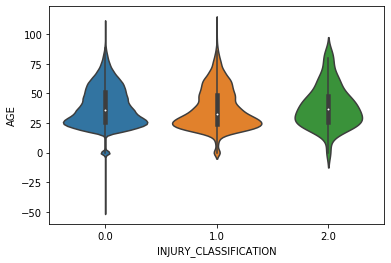

In [51]:
sns.violinplot(y=result['AGE'], x=result['INJURY_CLASSIFICATION'], data=result)

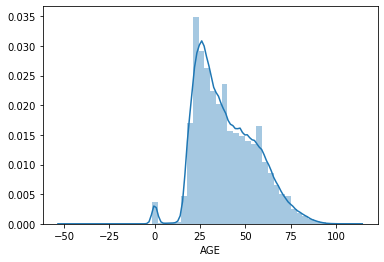

In [52]:
sns.distplot(result['AGE'])

In [17]:
# result['INJURY_CLASSIFICATION'].dropna(axis=0)

0          0.0
2          0.0
6          1.0
12         0.0
18         0.0
          ... 
1850956    0.0
1850959    0.0
1850961    0.0
1850963    0.0
1850965    0.0
Name: INJURY_CLASSIFICATION, Length: 406245, dtype: float64

In [54]:
result['INJURY_CLASSIFICATION'].value_counts()

0.0    391798
1.0     14253
2.0       194
Name: INJURY_CLASSIFICATION, dtype: int64

In [20]:
result['INJURY_CLASSIFICATION'].shape

(408529,)

In [55]:
result['INJURY_CLASSIFICATION'].replace({np.nan:0}, inplace=True)

In [137]:
result['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 148177
FAILING TO YIELD RIGHT-OF-WAY                                                        45899
FOLLOWING TOO CLOSELY                                                                45118
NOT APPLICABLE                                                                       21874
IMPROPER OVERTAKING/PASSING                                                          19759
IMPROPER BACKING                                                                     18431
FAILING TO REDUCE SPEED TO AVOID CRASH                                               17236
IMPROPER LANE USAGE                                                                  16432
IMPROPER TURNING/NO SIGNAL                                                           13798
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  12734
DISREGARDING TRAFFIC SIGNALS                                                          6924

In [56]:
G=['PERSON_TYPE', 'SEX', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED',
       'EJECTION','DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'BAC_RESULT', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']

In [57]:
frame0=pd.get_dummies(result[G], drop_first=True)

In [93]:
frame0.isna().sum()

POSTED_SPEED_LIMIT                                                                           0
CRASH_HOUR                                                                                   0
CRASH_DAY_OF_WEEK                                                                            0
CRASH_MONTH                                                                                  0
PERSON_TYPE_DRIVER                                                                           0
                                                                                            ..
SEC_CONTRIBUTORY_CAUSE_TURNING RIGHT ON RED                                                  0
SEC_CONTRIBUTORY_CAUSE_UNABLE TO DETERMINE                                                   0
SEC_CONTRIBUTORY_CAUSE_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)    0
SEC_CONTRIBUTORY_CAUSE_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)                  0
SEC_CONTRIBUTORY_CAUSE_WEATHER                    

In [211]:
X['CRASH_DAY_OF_WEEK'].value_counts()

6    66404
7    59613
3    59236
5    58995
4    58577
2    56942
1    48762
Name: CRASH_DAY_OF_WEEK, dtype: int64

In [59]:
X = frame0
y = result['INJURY_CLASSIFICATION']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)

In [67]:
dtc = DecisionTreeClassifier( criterion='gini', class_weight='balanced')

In [68]:
from sklearn import metrics

In [69]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [70]:
y_preds=dtc.predict(X_test)

In [207]:
print(metrics.f1_score(y_test, y_preds, average='macro'))
print(metrics.accuracy_score(y_test, y_preds))
print(metrics.precision_score(y_test, y_preds, average='macro'))
print(metrics.recall_score(y_test, y_preds, average='macro'))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_preds, pos_label=2)
metrics.auc(fpr, tpr)

0.4453541698294119
0.9514764317593976
0.4445529720977824
0.44639528972099213


0.6527491041474505

In [121]:
y_stuff= pd.DataFrame(y_preds)
y_stuff[0]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
122554    0.0
122555    0.0
122556    0.0
122557    0.0
122558    0.0
Name: 0, Length: 122559, dtype: float64

In [122]:
z_stuff=pd.DataFrame(y_test)
z_stuff['INJURY_CLASSIFICATION']


1581490    0.0
1554831    0.0
1286026    0.0
948964     0.0
894308     0.0
          ... 
723920     0.0
530926     0.0
1058037    0.0
954736     0.0
847914     0.0
Name: INJURY_CLASSIFICATION, Length: 122559, dtype: float64

""
0
1
2
3
4
...
723920
530926
1058037
954736


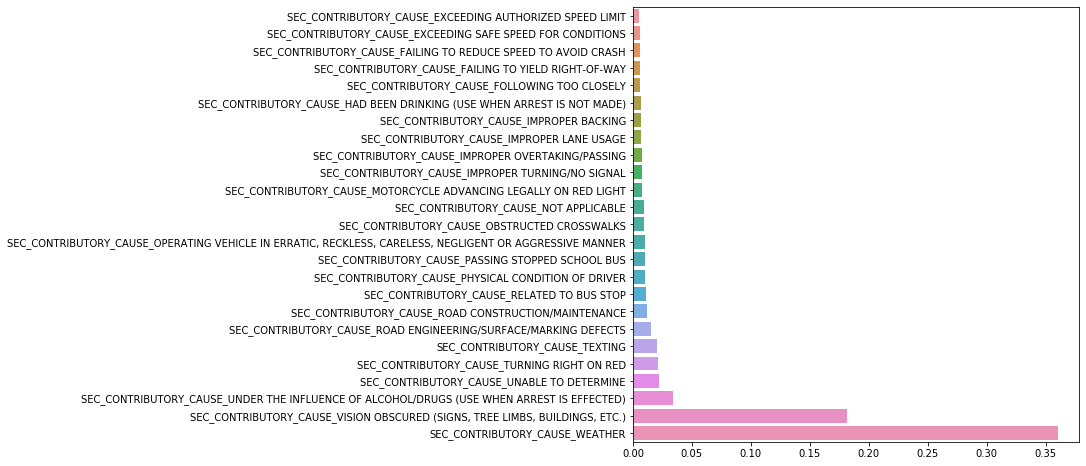

In [140]:
plt.figure(figsize=(8,8))
sns.barplot( y=X_train.columns.values[-25: ], x=np.sort(dtc.feature_importances_)[-25:], orient='h')

In [139]:
np.sort(dtc.feature_importances_)[-15:]

array([0.00802281, 0.00954179, 0.00961568, 0.00984543, 0.00994963,
       0.01007938, 0.01109635, 0.01177442, 0.01550589, 0.02043152,
       0.02100259, 0.02226376, 0.03405997, 0.18122953, 0.36049011])

In [ ]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(200,200))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(dtc)

In [208]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500, criterion= 'gini', warm_start=False, class_weight='balanced', 
                           bootstrap=True, min_samples_leaf= 2, n_jobs=-1, random_state = 20, verbose=1)
rfc.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.3min finished


RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       n_estimators=500, n_jobs=-1, random_state=20, verbose=1)

In [209]:
rfc_preds= rfc.predict(X_test)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    6.4s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    7.2s finished


In [210]:
print(metrics.f1_score(y_test, rfc_preds, average='macro'))
print(metrics.accuracy_score(y_test, rfc_preds))
print(metrics.precision_score(y_test, rfc_preds, average='macro'))
print(metrics.recall_score(y_test, rfc_preds, average='macro'))
fpr, tpr, thresholds = metrics.roc_curve(y_test, rfc_preds, pos_label=2)
metrics.auc(fpr, tpr)

0.49076835751239284
0.9515335471079235
0.49744401426194007
0.5235772672428333


0.8334333804047049

In [125]:
y_stuff= pd.DataFrame(rfc_preds)
y_stuff[0].value_counts()

0.0    115886
1.0      6665
2.0         8
Name: 0, dtype: int64

In [127]:
z_stuff['INJURY_CLASSIFICATION'].value_counts()

0.0    118147
1.0      4362
2.0        50
Name: INJURY_CLASSIFICATION, dtype: int64

In [ ]:
rfc.feature_importances_
np.sort(rfc.feature_importances_)[-15:]

In [ ]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(rfc)

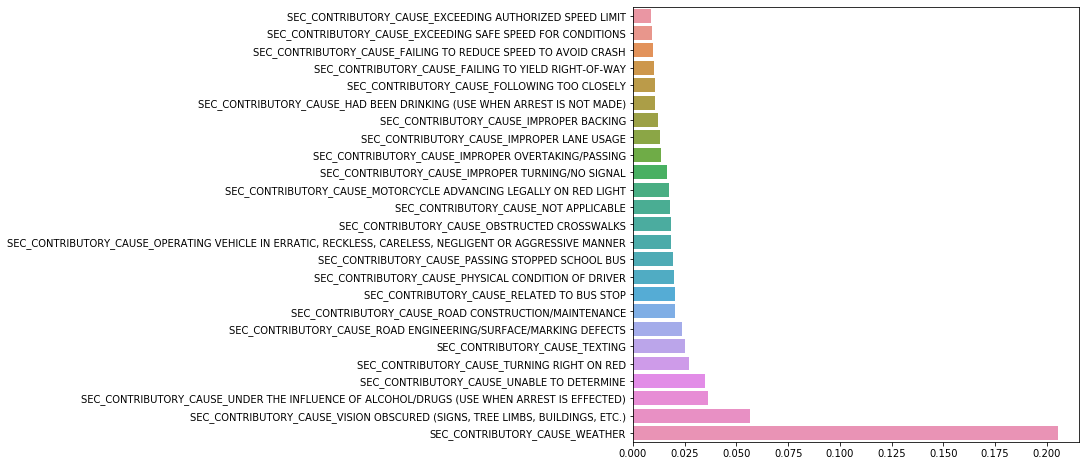

In [141]:
plt.figure(figsize=(8,8))
sns.barplot( y=X_train.columns.values[-25: ], x=np.sort(rfc.feature_importances_)[-25:], orient='h')

In [205]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6, weights='distance', n_jobs=-1)
knn.fit(X_train, y_train)
knn_preds=knn.predict(X_test)


In [206]:
print(metrics.f1_score(y_test, knn_preds, average='macro'))
print(metrics.accuracy_score(y_test, knn_preds))
print(metrics.precision_score(y_test, knn_preds, average='macro'))
print(metrics.recall_score(y_test, knn_preds, average='macro'))
fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_preds, pos_label=2)
metrics.auc(fpr, tpr)

0.3709712518847907
0.9644334565392995
0.8434875811711308
0.35619068180282937


0.5284641128406892

In [72]:
from sklearn.feature_selection import RFECV
selector = RFECV(estimator=dtc, step=1, cv=3, n_jobs=-1, verbose=3, scoring='neg_mean_squared_error')
selector.fit(X_train, y_train)
RFECV_preds=selector.predict(X_test)


Fitting estimator with 254 features.
Fitting estimator with 253 features.
Fitting estimator with 252 features.
Fitting estimator with 251 features.
Fitting estimator with 250 features.
Fitting estimator with 249 features.
Fitting estimator with 248 features.
Fitting estimator with 247 features.
Fitting estimator with 246 features.
Fitting estimator with 245 features.
Fitting estimator with 244 features.
Fitting estimator with 243 features.
Fitting estimator with 242 features.
Fitting estimator with 241 features.
Fitting estimator with 240 features.
Fitting estimator with 239 features.
Fitting estimator with 238 features.
Fitting estimator with 237 features.
Fitting estimator with 236 features.
Fitting estimator with 235 features.
Fitting estimator with 234 features.
Fitting estimator with 233 features.
Fitting estimator with 232 features.
Fitting estimator with 231 features.
Fitting estimator with 230 features.
Fitting estimator with 229 features.
Fitting estimator with 228 features.
F

In [204]:
print(metrics.f1_score(y_test, RFECV_preds, average='macro'))
print(metrics.accuracy_score(y_test, RFECV_preds))
print(metrics.precision_score(y_test, RFECV_preds, average='macro'))
print(metrics.recall_score(y_test, RFECV_preds, average='macro'))
fpr, tpr, thresholds = metrics.roc_curve(y_test, RFECV_preds, pos_label=2)
metrics.auc(fpr, tpr)

0.4322969750079179
0.9523576399937989
0.436954321065808
0.42826075732394814


0.754061742402599

In [74]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [75]:
list(selected_rfe)

['POSTED_SPEED_LIMIT',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH',
 'PERSON_TYPE_PEDESTRIAN',
 'SEX_M',
 'SEX_X',
 'SAFETY_EQUIPMENT_HELMET USED',
 'SAFETY_EQUIPMENT_NONE PRESENT',
 'SAFETY_EQUIPMENT_SAFETY BELT USED',
 'SAFETY_EQUIPMENT_USAGE UNKNOWN',
 'AIRBAG_DEPLOYED_DEPLOYED, FRONT',
 'AIRBAG_DEPLOYED_DEPLOYMENT UNKNOWN',
 'AIRBAG_DEPLOYED_DID NOT DEPLOY',
 'AIRBAG_DEPLOYED_NOT APPLICABLE',
 'DRIVER_ACTION_DISREGARDED CONTROL DEVICES',
 'DRIVER_ACTION_FAILED TO YIELD',
 'DRIVER_ACTION_OTHER',
 'DRIVER_ACTION_TOO FAST FOR CONDITIONS',
 'DRIVER_ACTION_UNKNOWN',
 'DRIVER_VISION_NOT OBSCURED',
 'DRIVER_VISION_UNKNOWN',
 'PHYSICAL_CONDITION_FATIGUED/ASLEEP',
 'PHYSICAL_CONDITION_IMPAIRED - ALCOHOL',
 'PHYSICAL_CONDITION_NORMAL',
 'PHYSICAL_CONDITION_UNKNOWN',
 'BAC_RESULT_TEST PERFORMED, RESULTS UNKNOWN',
 'BAC_RESULT_TEST REFUSED',
 'TRAFFIC_CONTROL_DEVICE_NO CONTROLS',
 'TRAFFIC_CONTROL_DEVICE_SCHOOL ZONE',
 'TRAFFIC_CONTROL_DEVICE_STOP SIGN/FLASHER',
 'DEVICE_CONDITION_NO C

In [130]:
from sklearn.linear_model import RidgeClassifier
ridge_clf = RidgeClassifier(class_weight='balanced').fit(X_train, y_train)
ridge_preds= ridge_clf.predict(X_test)

In [201]:
print(metrics.f1_score(y_test, ridge_preds, average='macro'))
print(metrics.accuracy_score(y_test, ridge_preds))
print(metrics.precision_score(y_test, ridge_preds, average='macro'))
print(metrics.recall_score(y_test, ridge_preds, average='macro'))
from sklearn.metrics import roc_auc_score
# roc_auc_score(y_test, ridge_preds, multi_class='ovr', max_fpr=None, average='macro')
fpr, tpr, thresholds = metrics.roc_curve(y_test, ridge_preds, pos_label=2)
metrics.auc(fpr, tpr)

0.3961701669758853
0.814513825994011
0.3899173884860696
0.8193993045245959


0.9579837399701245

In [132]:
from sklearn.ensemble import VotingClassifier

In [133]:
voting_clf = VotingClassifier(
                estimators=[('r_forest', rfc), ('knneighbors', knn), ('decisiontree', dtc)], 
                voting='soft')

In [134]:
voting_clf.fit(X_train, y_train)

vc_preds = voting_clf.predict(X_test)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   11.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:   12.4s finished


In [203]:
print(metrics.f1_score(y_test, vc_preds, average='macro'))
print(metrics.accuracy_score(y_test, vc_preds))
print(metrics.precision_score(y_test, vc_preds, average='macro'))
print(metrics.recall_score(y_test, vc_preds, average='macro'))
fpr, tpr, thresholds = metrics.roc_curve(y_test, vc_preds, pos_label=2)
metrics.auc(fpr, tpr)

0.4585041560312006
0.9600682120448111
0.49737314380491576
0.43670761833946115


0.6383295104849439

In [168]:
from sklearn.metrics import plot_confusion_matrix
import sklearn
matrix = sklearn.metrics.confusion_matrix(y_test, vc_preds)
matrix
from sklearn.metrics import confusion_matrix
import matplotlib
matplotlib.axes.Axes.imshow
matplotlib.pyplot.imshow

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs)>

In [178]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.twilight):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [179]:
cnf_matrix = confusion_matrix(y_test, vc_preds,labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['No injury','Minor Injury','Severe Injury'],
                      title='',cmap=plt.cm.twilight);

Confusion matrix, without normalization
[[116421   1713     13]
 [  3115   1242      5]
 [    35     13      2]]


AttributeError: module 'matplotlib' has no attribute 'imshow'

In [214]:
graph_data=result.groupby('INJURY_CLASSIFICATION').apply(lambda x:x.sort_values(by=['INJURY_CLASSIFICATION'],
                                                                    ascending=True))

In [213]:
result['INJURY_CLASSIFICATION'].value_counts()

0.0    394082
1.0     14253
2.0       194
Name: INJURY_CLASSIFICATION, dtype: int64

In [217]:
graph_data=graph_data[-194: ]